In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [2]:
insurance = pd.read_csv('/content/insurance_data - insurance_data (1).csv')
insurance.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

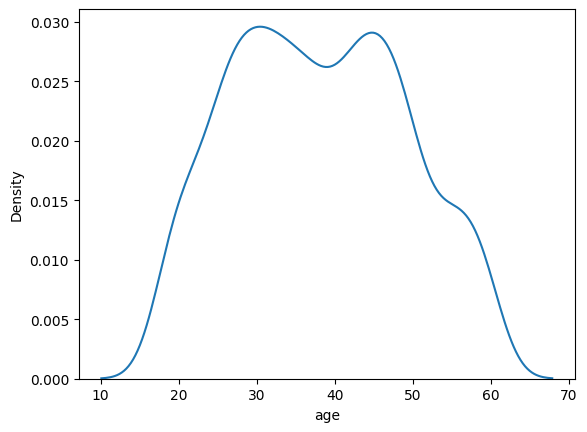

In [4]:
# code here
sns.kdeplot(insurance['age'])
plt.show()

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [8]:
# answer here
insurance[insurance['bmi'] > 30]['bmi'].shape[0]/ insurance.shape[0]

0.5216417910447761

### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

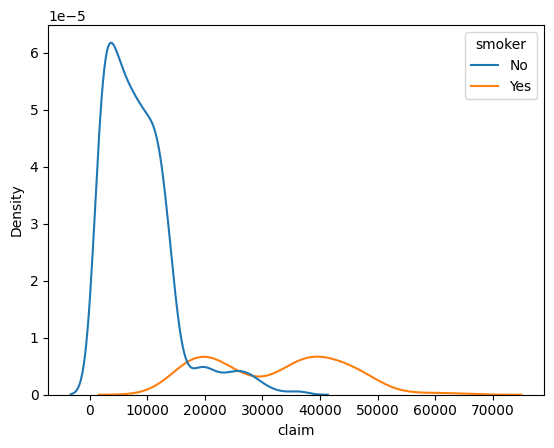

In [9]:
# code here
sns.kdeplot(data=insurance, x='claim', hue='smoker')
plt.show()

# OBSERVATIONS
1. SMOKER
- bimodal
- 20000 and 40000 are modes

2. NON-SMOKER
- most of the values are less than 30000

So, in general, the claim amount of a  non-smoker is less than that of a smoker

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

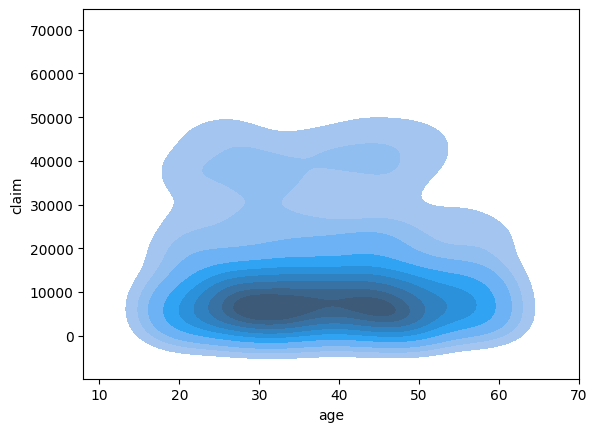

In [14]:
# code here
sns.kdeplot(data=insurance, x='age', y='claim', fill=True)
plt.show()

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

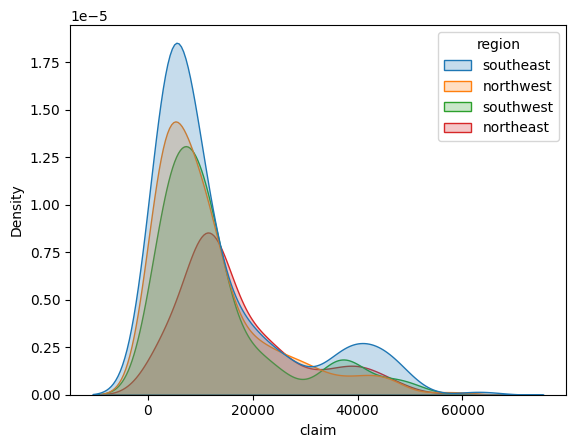

In [15]:
# code here
sns.kdeplot(data=insurance, x='claim', hue='region', fill=True)
plt.show()

OBSERVATIONS
- Distribution of claim for all regions is bimodal
- For all regions except southeast, there is some value for the global peak
- The global peak ranges from 6000-12000 and the local peak is around 40000 for all regions

### Q6: Plot PDF and CDF of claim in insurance data

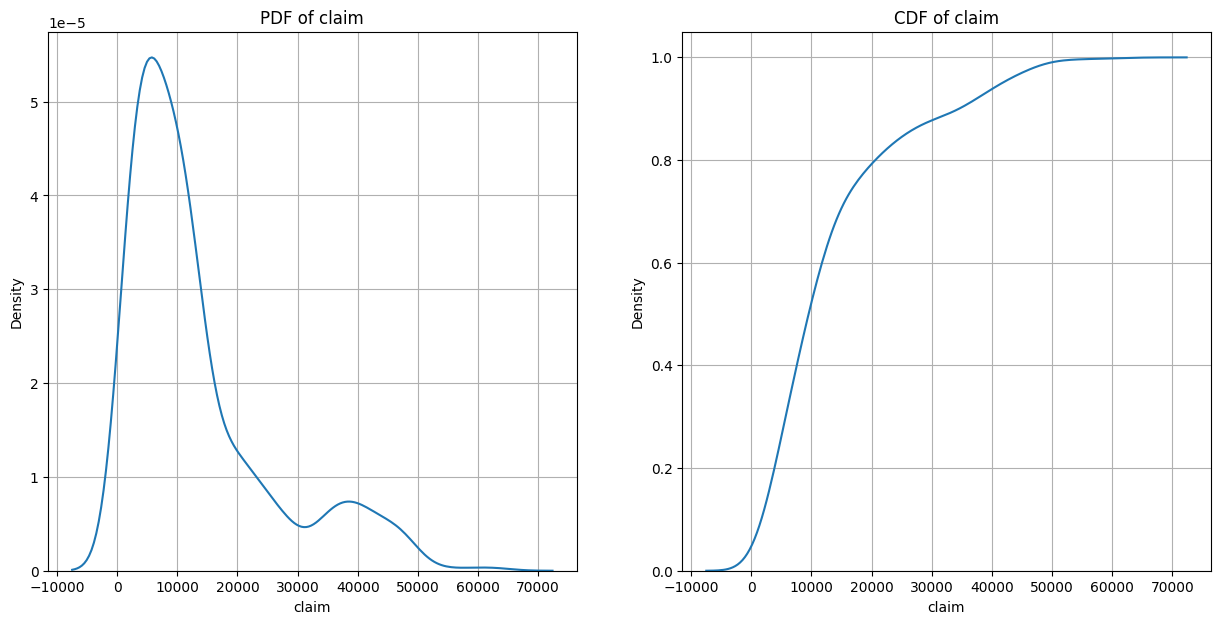

In [25]:
# code here

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

#PDF
sns.kdeplot(data=insurance, x='claim', ax=ax1)
ax1.set_title("PDF of claim")
ax1.grid(True)

# CDF
sns.kdeplot(data=insurance, x='claim', ax=ax2, cumulative=True)
ax2.set_title("CDF of claim")
ax2.grid(True)

plt.show()

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

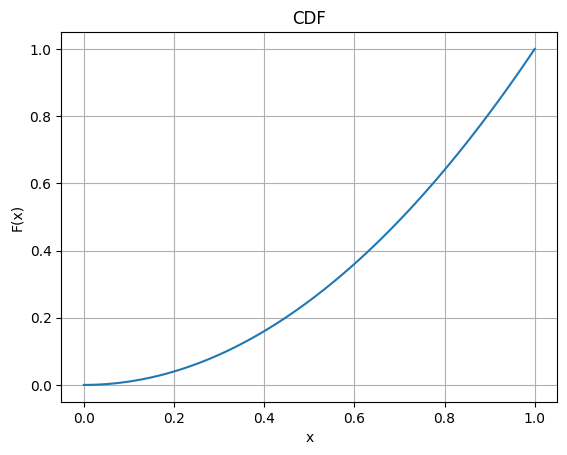

In [31]:
# code here

def pdf(x):
  if 0 <= x<= 1:
    return 2*x
  else:
    return 0

def cdf(x):
  if x<0:
    return 0
  elif 0 <= x <=1:
    return x**2
  else:
    return 1


# generating 100 data points between 0 and 1
x = np.linspace(0,1, 100)

pdf_y = np.array([cdf(xi) for xi in x])


plt.plot(x, pdf_y)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("CDF")
plt.grid(True)
plt.show()

Probability that x>0.5 = 1- probability that x<0.5 = 1-0.3 = 0.7

### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

The probability density function (PDF) of a normal distribution with mean μ and standard deviation σ is given by:

`f(x) = (1 / (σ * sqrt(2 * π))) * exp(-(x - μ)^2 / (2 * σ^2))`



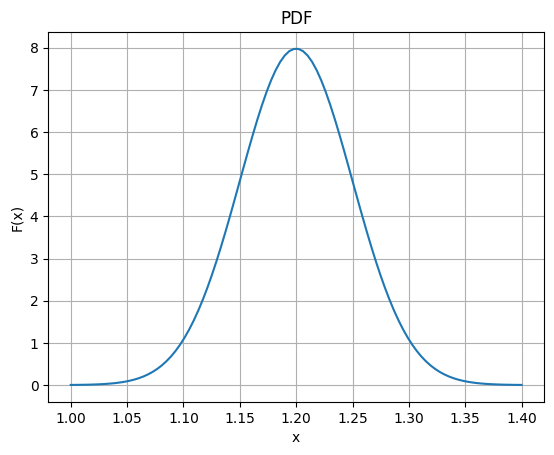

Probability that x is between 1.1 and 1.3 is 0.9544997361036409


In [43]:
# answer here
from scipy import integrate
x1 = 1.1
x2 = 1.3
mean = 1.2
std = 0.05

def pdf(x, mean, std):
   return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))


# generating 100 data points between 0 and 2
x = np.linspace(1, 1.4, 100)
pdf_y = pdf(x, mean, std)

plt.plot(x, pdf_y)
plt.title("PDF")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.show()


# probability that x is between 1.1 and 1.3
lower_bound = 1.1
upper_bound = 1.3
prob = integrate.quad(lambda x: pdf(x, mean, std), lower_bound, upper_bound)[0]
print(f"Probability that x is between 1.1 and 1.3 is {prob}")

[CDF of Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) : 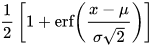

In [44]:
# solving the question using CDF of normal distribution

def cdf(x, mean, std):
  return (1 + np.math.erf((x-mean)/ (std * np.sqrt(2)))) * 0.5

cdf(1.3, mean, std) - cdf(1.1, mean, std)

0.9544997361036416

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

In [45]:
# answer here
# Cross validation approach
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Generate a sample of 100 ages
ages = np.random.normal(loc=40, scale=10, size=100)

# Define the range of bandwidths to test
bandwidths = 10 ** np.linspace(-1, 1, 100)

# Define the parameters for the kernel density estimator
params = {'bandwidth': bandwidths, 'kernel': ['gaussian']}

# Create a GridSearchCV object to find the best bandwidth
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(ages.reshape(-1, 1))

# Extract the best bandwidth from the GridSearchCV object
best_bandwidth = grid.best_estimator_.bandwidth
print('Best bandwidth:', best_bandwidth)


Best bandwidth: 4.977023564332112


In [46]:
# Scott rule bandwidth
# h = 1.06 * sigma * n^(-1/5)
h = 1.06 * 10 * (100**(-1/5))
print("Scott rule bandwidth:", h)

Scott rule bandwidth: 4.219936007867071
